In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import matplotlib
import plotly.graph_objects as go

In [31]:
data = pd.read_csv("facpolviews.csv")
data = data.rename(columns={"Which political party do you most align with?":"party","Who do you think should be the next presidential candidate?":"demCand", "Other Comments?" : "ocD", "Do you support the Trump administration?":"Trump","Other Comments?.1":"ocR" })
data = data.drop(columns={"Timestamp"})

# preparing/cleaning data
data["party"][4] = "Independent"
data["party"][28] = "Independent"
data["party"][33] = "Independent"
data["party"][38] = "Independent"
data["party"][40] = "Independent"
data["party"][44] = "Independent"
data["party"][48] = "Independent"
data["party"][49] = "Independent" # this one is technically unenrolled

data["demCand"][5]="Amy Klobuchar"
data["demCand"][19]="Cory Booker"
data["demCand"][22]="Alexandria Ocasio-Cortez"
data["demCand"][28]="Undecided" #this one said "whomever becomes the nominee to run against Trump" before
data["demCand"][29]="Deval Patrick"
data["demCand"][30]="Cory Booker"
data["demCand"][36]="Michael Bloomberg"
data["demCand"][40]="Undecided"
data["demCand"][45]="Undecided"
data["demCand"][46]="Undecided"
data["demCand"][49]="Michael Bloomberg"

minidat = data.set_index(["party", "ocR","ocD"]).count(level="party")
numDems = minidat['demCand'][0]
numReps = minidat['Trump'][2]
numInds = minidat['demCand'][1]

trump = data.set_index(["Trump", "ocR","ocD"]).count(level="Trump")
trump['party'][0]=trump['party'][0]-1 # accounting for the independent who voted

trumpSup = trump['party'][1]
trumpDis = trump['party'][0]

minidata = data.set_index(["demCand", "ocR","ocD"]).count(level="demCand")
aoc = minidata['party'][0]
ak = minidata['party'][1]
bs = minidata['party'][2]
cb = minidata['party'][3]
dp = minidata['party'][4]
ew = minidata['party'][5]
jb = minidata['party'][6]
mb = minidata['party'][7]
pb = minidata['party'][8]
undecided = minidata['party'][9]
listDemCands = [aoc,ak,bs,cb,dp,ew,jb,mb,pb,undecided]
listNames = ["AOC","Amy Klobuchar","Bernie Sanders","Cory Booker","Deval Patrick","Elizabeth Warren","Joe Biden","Michael Bloomberg","Pete Buttigieg","Undecided"]

In [32]:
labels = ["Middlesex Faculty","Democrats","Republicans","Independents"]
parents = ["","Middlesex Faculty","Middlesex Faculty","Middlesex Faculty"]
values = [0,numDems, numReps, numInds]

for i in range(len(listNames)):
    labels.append(listNames[i])
    values.append(listDemCands[i])   
    parents.append("Democrats")

labels.append("Support Trump")
parents.append("Republicans")
values.append(trumpSup)

labels.append("Do not support Trump")
parents.append("Republicans")
values.append(trumpDis)



In [33]:
fig =go.Figure(go.Sunburst(
  labels= labels,
  parents= parents,
    values = values
))
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

In [34]:
fig =go.Figure(go.Sunburst(
    labels=["","Alexandria Ocasio-Cortez", "Amy Klobuchar", "Bernie Sanders", "Cory Booker", "Deval Patrick", "Elizabeth Warren", "Joe Biden", "Michael Bloomberg", "Pete Buttigieg"],
    parents=["","Democrat", "Democrat", "Democrat", "Democrat", "Democrat", "Democrat", "Democrat", "Democrat", "Democrat"],
    values=[0, aoc, ak, bs, cb,dp,ew,jb,mb, pb],
))
# Update layout for tight margin
# See https://plot.ly/python/creating-and-updating-figures/
fig.update_layout(margin = dict(t=0, l=0, r=0, b=0))

fig.show()

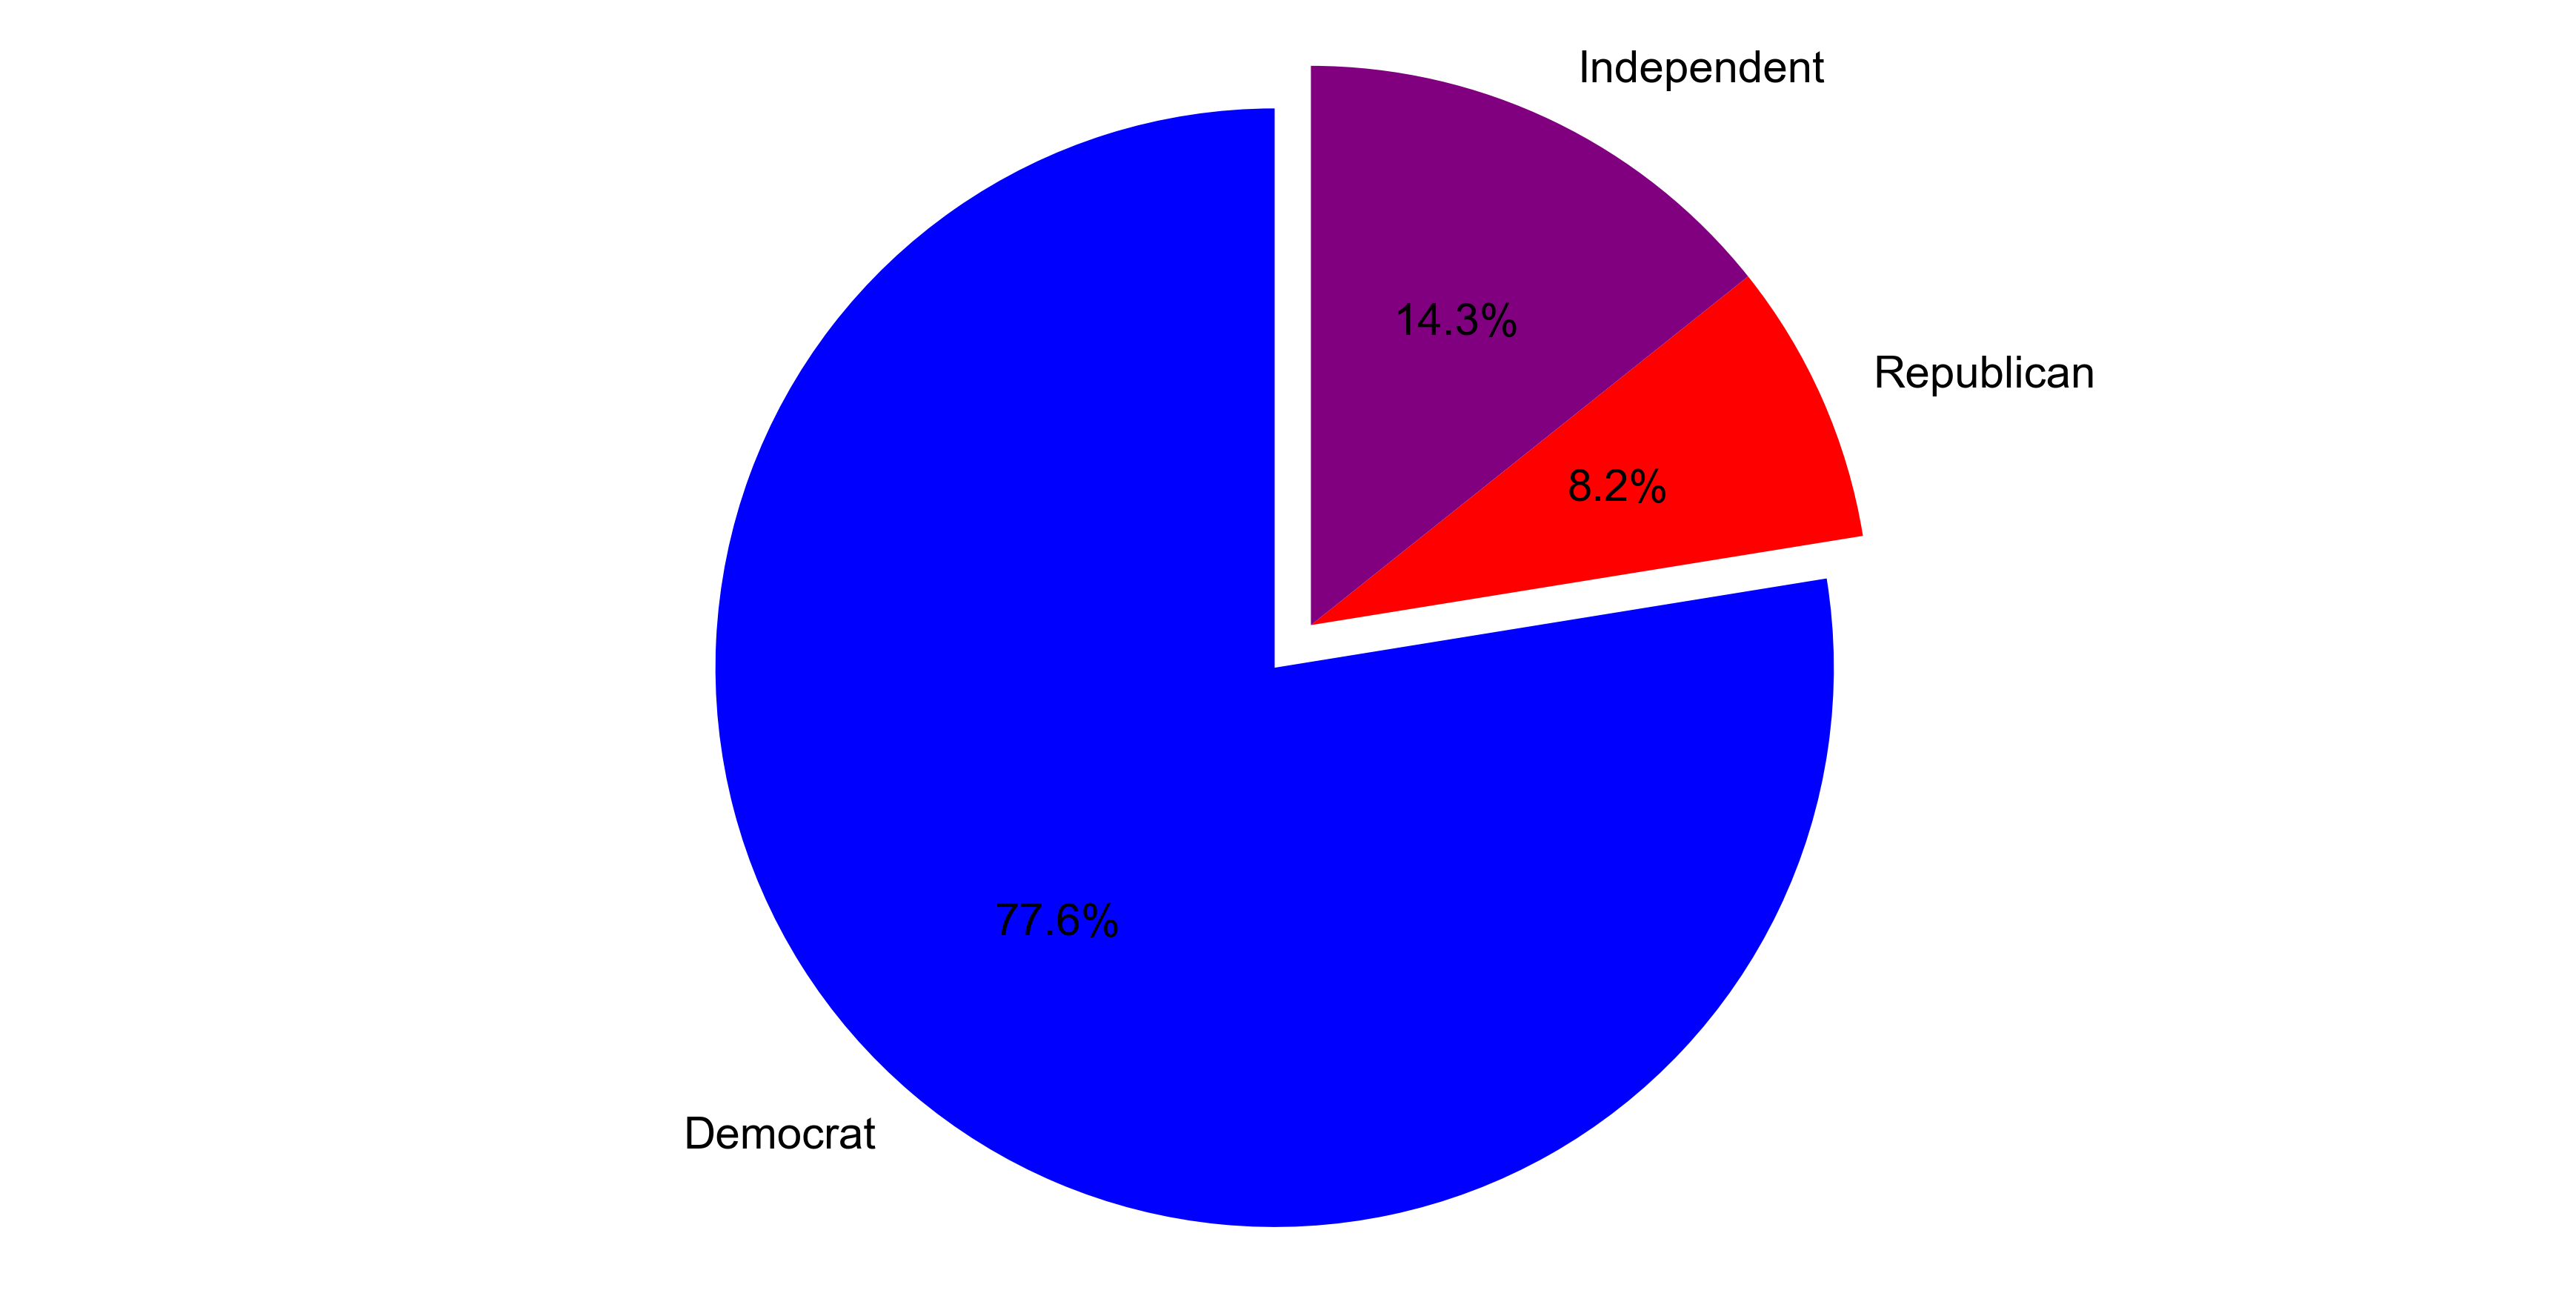

In [37]:
### PIE CHART FOR PARTY REPRESENTATION
# aesthetics
fig= plt.figure(figsize=(60,30))
font = {'family' : 'Arial',
        'weight' : 'light',
        'size'   : 60}

matplotlib.rc('font', **font)
axes= fig.add_axes([0.1,0.1,0.8,0.8])

# Data to plot
labels = 'Democrat', 'Republican', 'Independent'
sizes = [numDems, numReps, numInds]
colors = ['blue', 'red', 'purple']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode = explode, labels=labels, colors=colors,
autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()

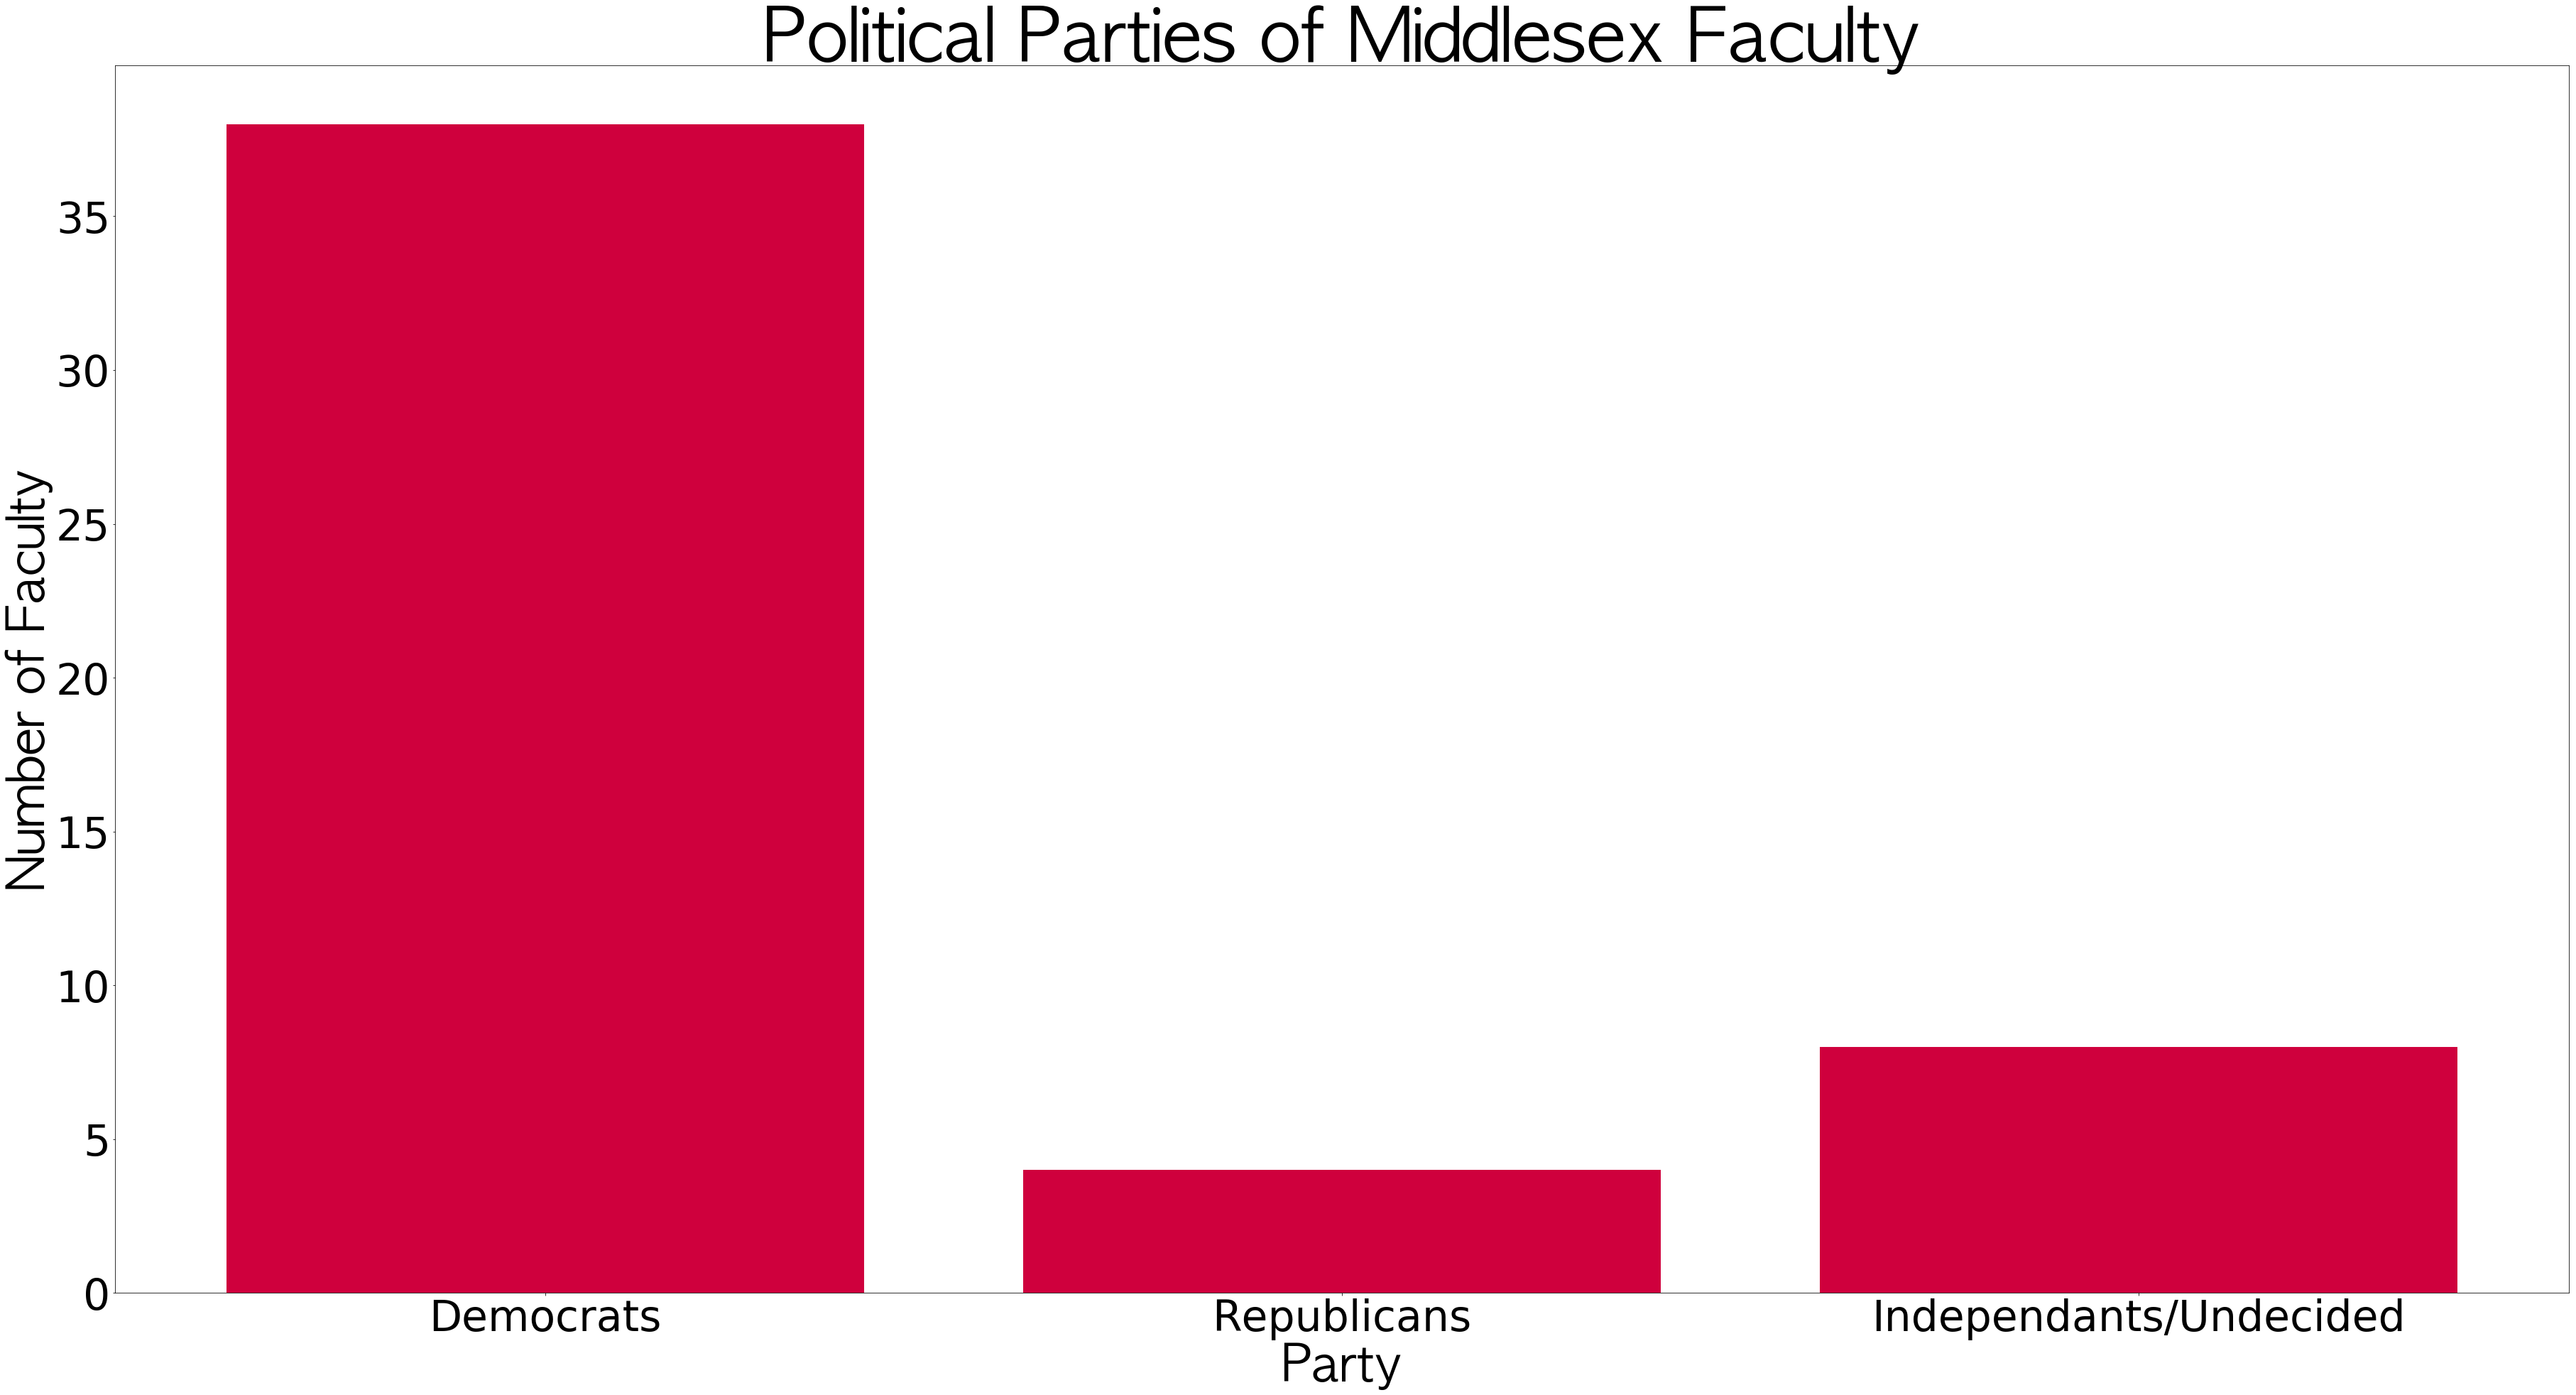

In [38]:
### BAR GRAPH FOR PARTY REPRESENTATION
# aesthetics
fig= plt.figure(figsize=(60,30), num="classic")
font = {'family' : 'comic-sans',
        'weight' : 'light',
        'size'   : 60}

matplotlib.rc('font', **font)
axes= fig.add_axes([0.1,0.1,0.8,0.8])

objects = ('Democrats', 'Republicans', 'Independants/Undecided')
y_pos = np.arange(len(objects))
performance = [minidat['demCand']['Democrat'],minidat["Trump"]["Republican"],(minidat['Trump']['Independent']+minidat['demCand']['Independent'])]

plt.bar(y_pos, performance, align='center', alpha=1, color ="#cf003d")
plt.xticks(y_pos, objects)
plt.xlabel('Party',fontname='AppleGothic', fontsize=70)
plt.ylabel('Number of Faculty',fontname='AppleGothic', fontsize=70)
plt.title('Political Parties of Middlesex Faculty',fontname='AppleGothic', fontsize=100)

plt.show()

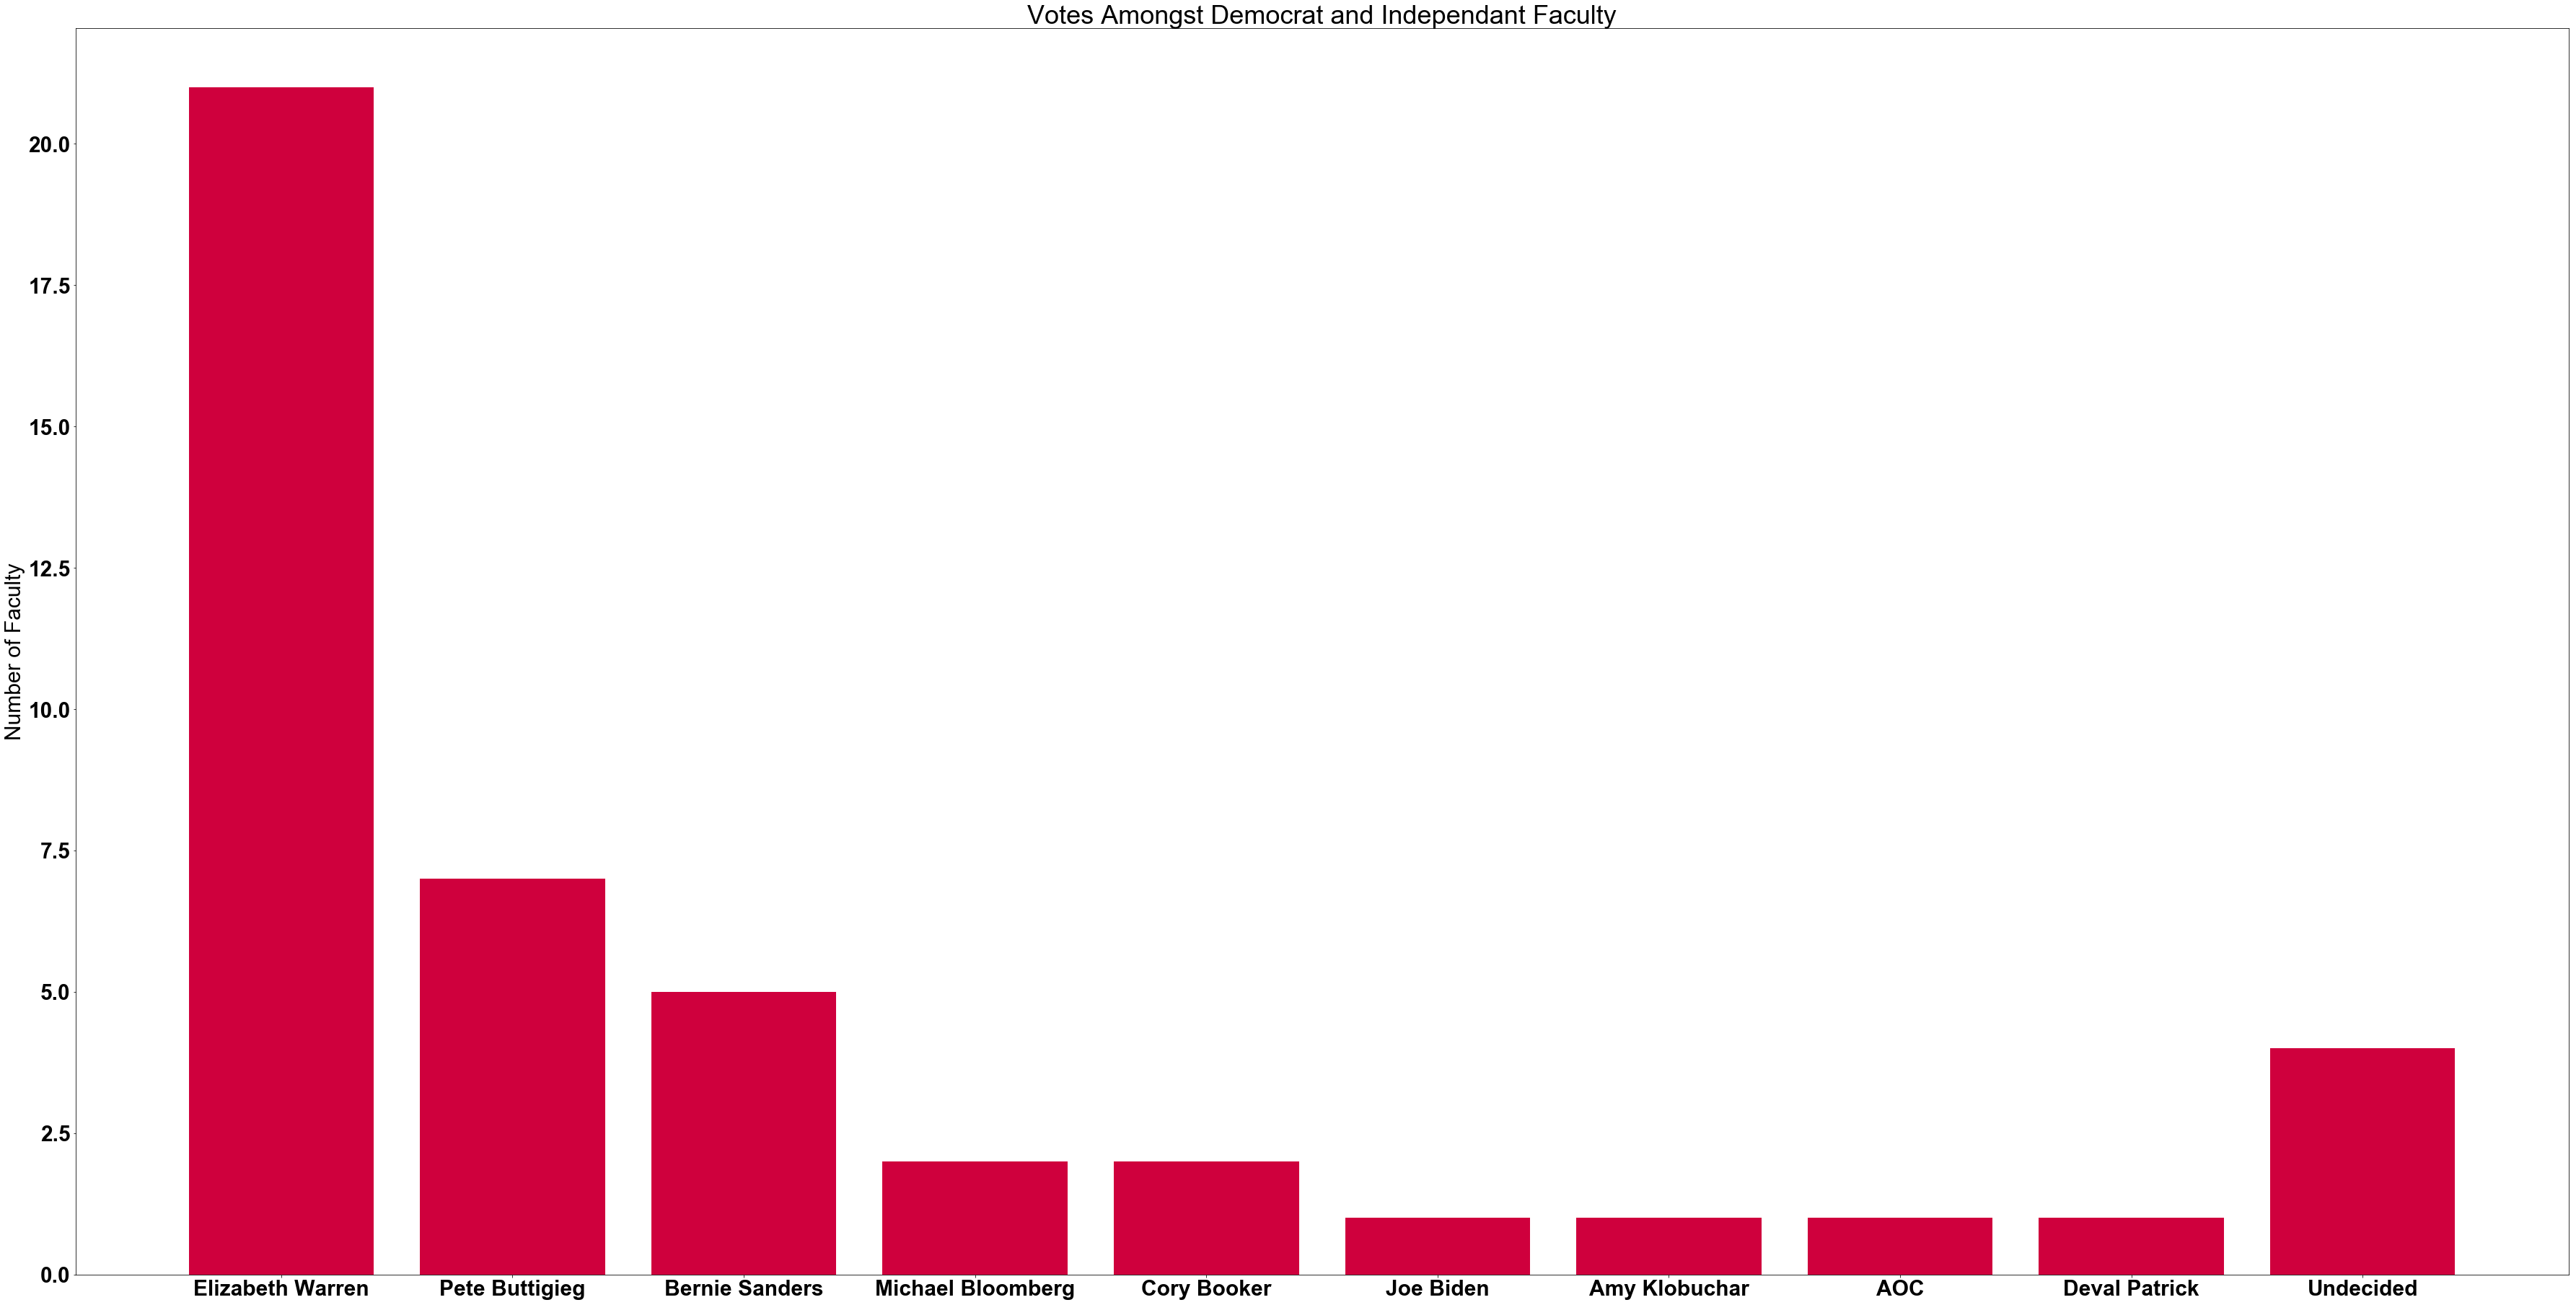

In [41]:
objects = ('Elizabeth Warren', 'Pete Buttigieg', 'Bernie Sanders', 'Michael Bloomberg', 'Cory Booker','Joe Biden','Amy Klobuchar','AOC','Deval Patrick','Undecided')
y_pos = np.arange(len(objects))

fig= plt.figure(figsize=(60,30))

font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 30}

matplotlib.rc('font', **font)

axes= fig.add_axes([0.1,0.1,0.8,0.8])
performance = [minidata['party']['Elizabeth Warren'],
               minidata['party']['Pete Buttigieg'],
                minidata['party']['Bernie Sanders'],
               minidata['party']['Michael Bloomberg'],
               minidata['party']['Cory Booker'],
               minidata['party']['Joe Biden'],
               minidata['party']['Amy Klobuchar'],
               minidata['party']['Alexandria Ocasio-Cortez'],
               minidata['party']['Deval Patrick'],
               minidata['party']['Undecided']]

plt.bar(y_pos, performance, align='center', alpha=1, color ="#cf003d")
plt.xticks(y_pos, objects)
plt.ylabel('Number of Faculty')
plt.title('Votes Amongst Democrat and Independant Faculty')

plt.show()

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.

/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning:

findfont: Font family ['times'] not found. Falling back to DejaVu Sans.



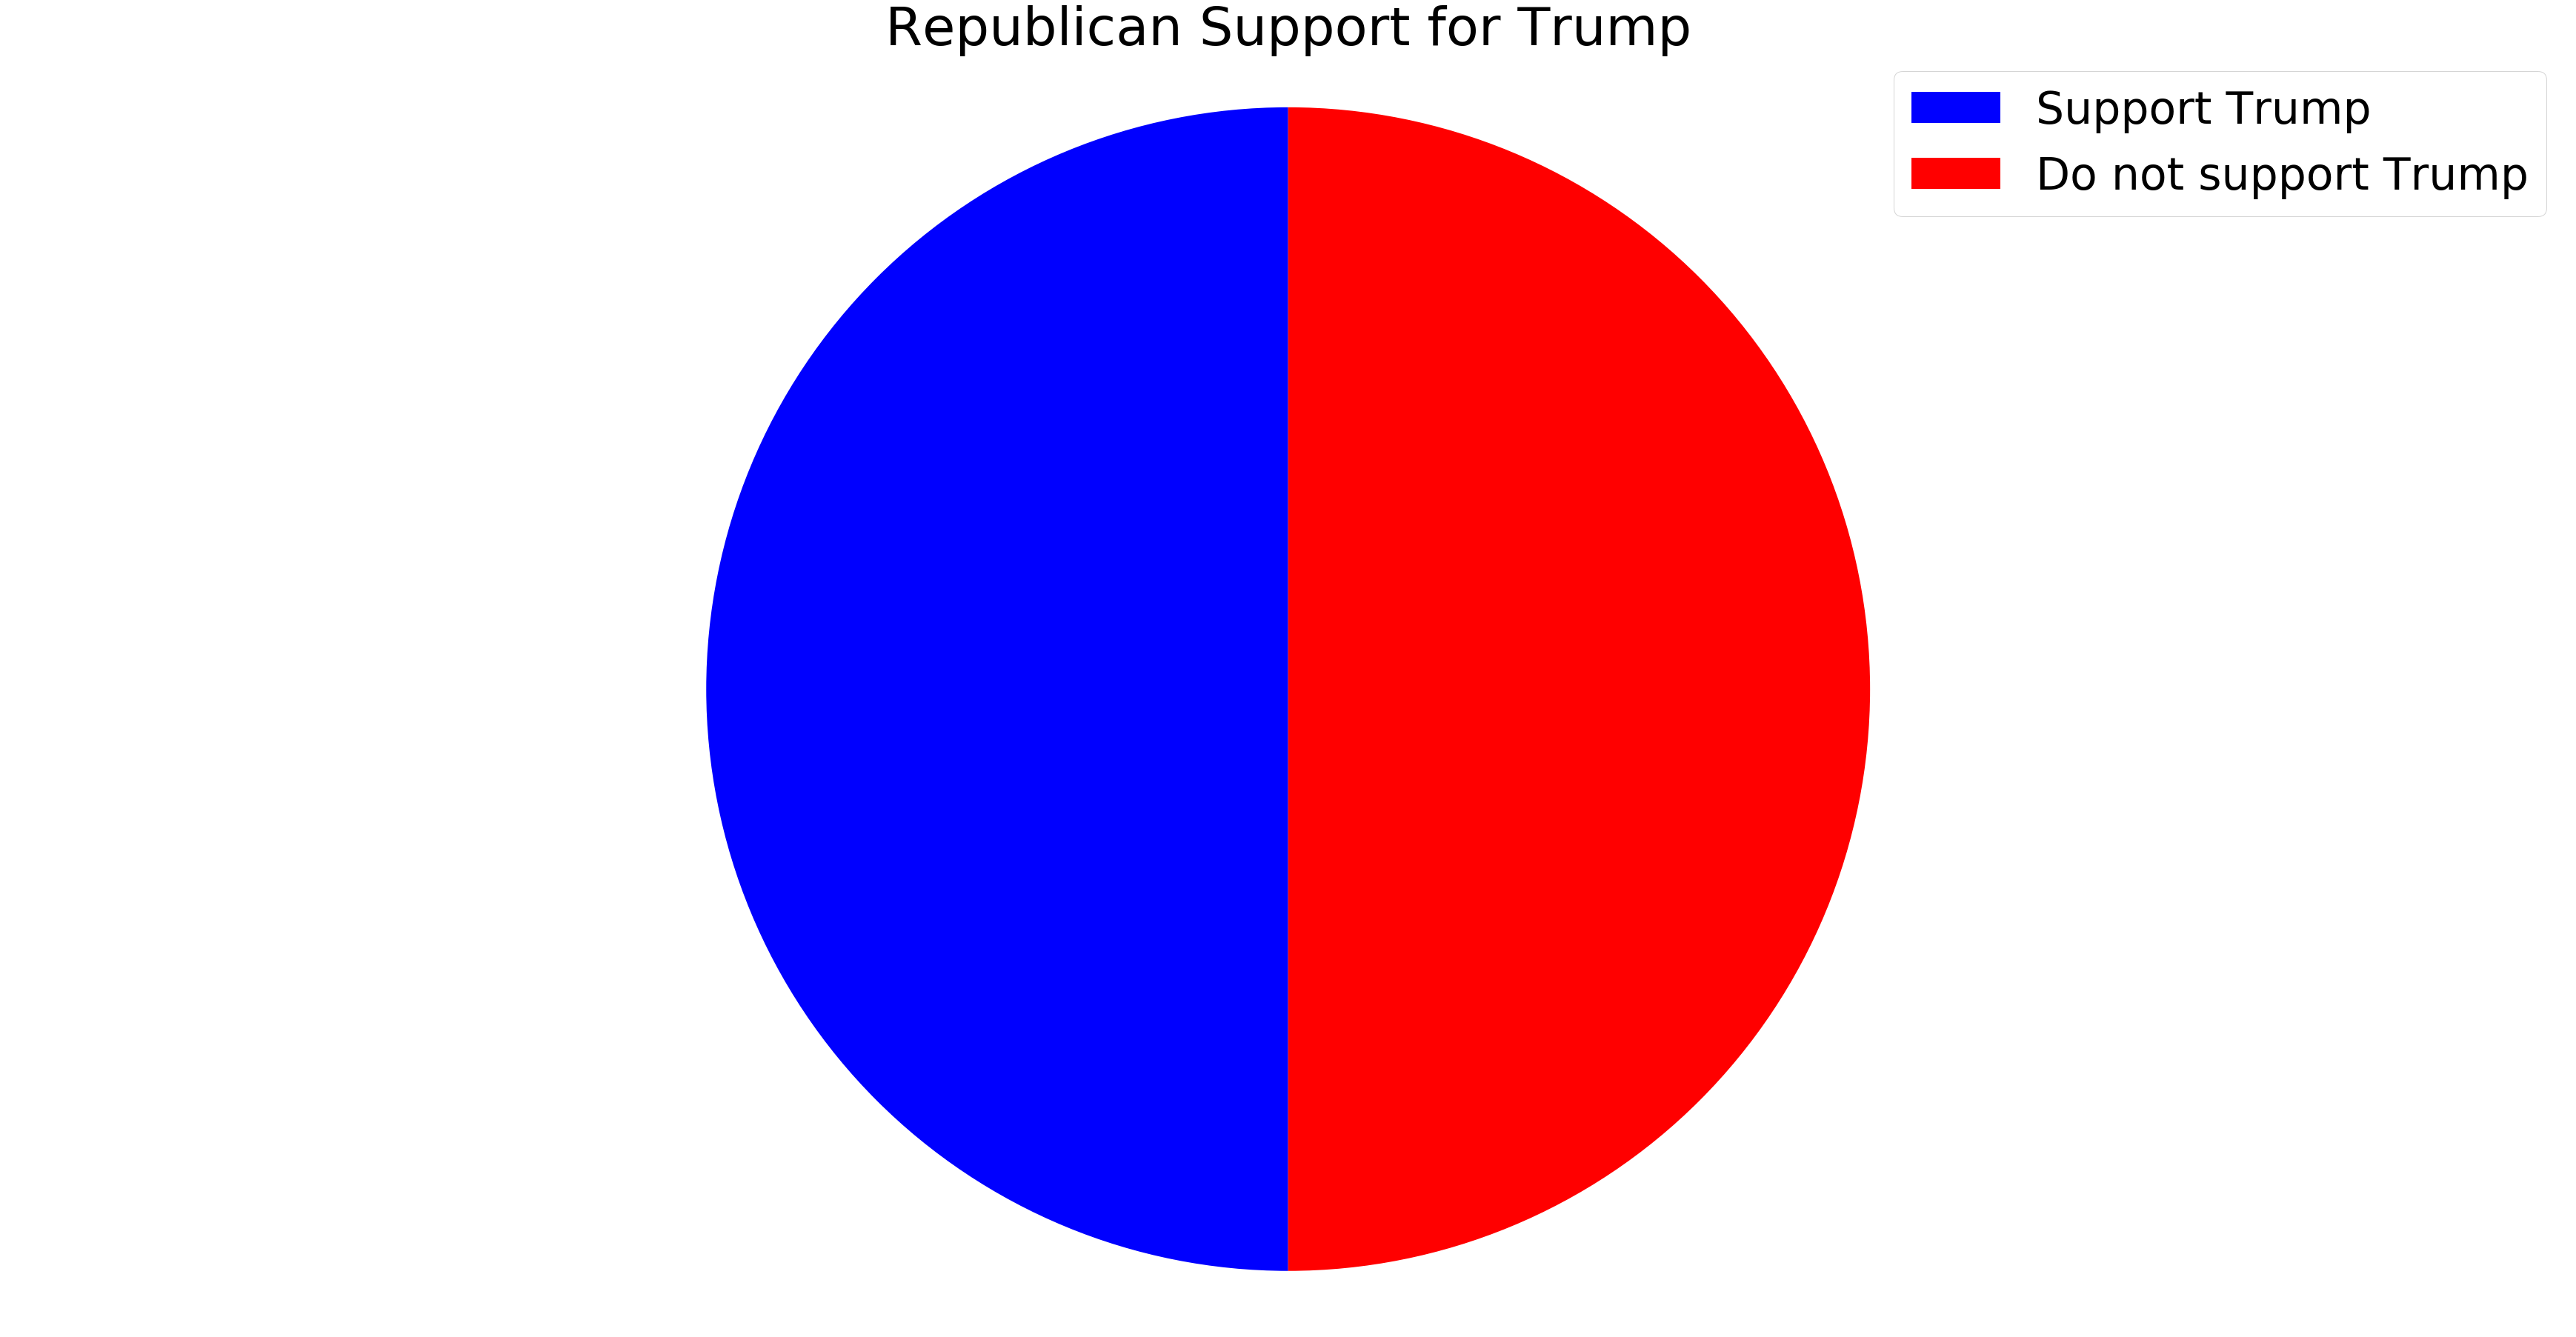

In [40]:
# aesthetics
fig= plt.figure(figsize=(60,30))
font = {'family' : 'times',
        'weight' : 'light',
        'size'   : 60}

matplotlib.rc('font', **font)
axes= fig.add_axes([0.1,0.1,0.8,0.8])

# Data to plot
labels = "Support Trump","Do not support Trump"
sizes = [trump['party'][1],trump['party'][0]]
colors = ['blue', 'red']

patches, texts = plt.pie(sizes, colors=colors, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title('Republican Support for Trump')

plt.axis('equal')
plt.show()